In [1]:
import numpy as np
from tqdm import tqdm
from minkowski_pushers import Boris, GCA
import matplotlib.pyplot as plt
from progiter import ProgIter

In [2]:
def B_pp(position):
    return np.array([1e3, 0, 0])

def E_pp(position):
    return np.array([0, 0, 0])

In [15]:
25*50

1250

In [20]:
dt * 1e7 / 50

2000.0

In [9]:
x = np.array([0, 0, 0])
u = np.array([1e5, 1e1, 0])

# iters = int(1e6)
# dt = 1e-1
u_b = np.array([0, 0, 0])
nr = 1 / 50
field_params = (u_b, nr)
pusher = Boris('pp', 'prob', field_params)

dt = 1e-1
iters = 20000

x_list = []
u_list = []

for i in ProgIter(range(iters)):
    x, u = pusher.push(x, u, E_pp, B_pp, dt)
    x_list.append(x)
    u_list.append(u)


 100.00% 20000/20000... rate=11464.97 Hz, eta=0:00:00, total=0:00:01


In [25]:
np.linspace(0, 10, 10)

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

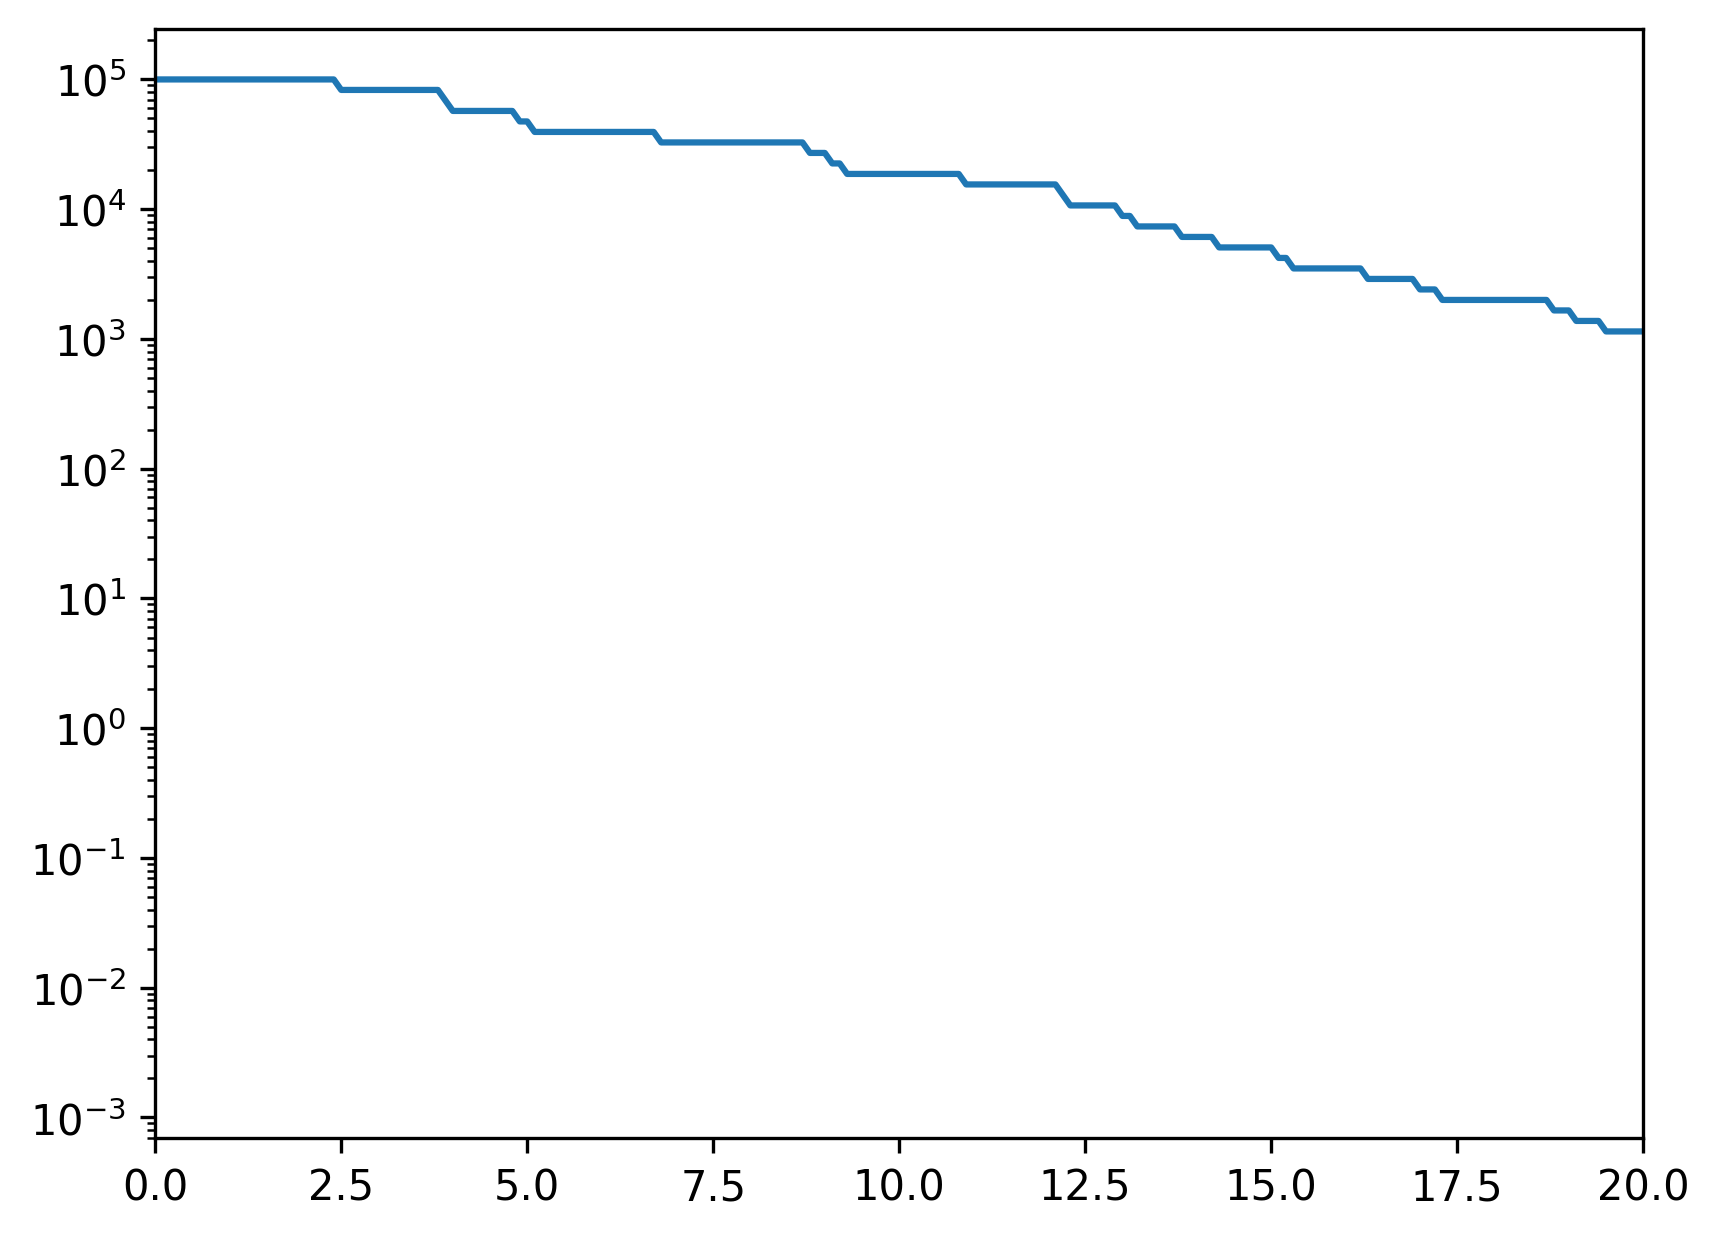

In [10]:
fig, ax = plt.subplots(dpi = 300)
t_list = np.arange(0, iters * dt, dt)
ax.set(xscale = 'linear', yscale = 'log', xlim = (0, 20))
ax.plot(t_list, [np.linalg.norm(u_list[i]) for i in range(len(u_list))])
plt.show()

In [13]:
def B_pp(position):
    return np.array([0, 0, 0])

def E_pp(position):
    return np.array([0, 0, 0])

In [16]:
x = np.array([0, 0, 0])
u = np.array([1e3, 0, 0])

# iters = int(1e6)
# dt = 1e-1
u_b = np.array([0, 1, 0])
nr = 1 / 50
#lambda_0 = 100
field_params = (u_b, nr)
pusher = Boris('pp', 'prob', field_params)

dt = 1e-1
iters = 20000

x_list = []
u_list = []

for i in ProgIter(range(iters)):
    x, u = pusher.push(x, u, E_pp, B_pp, dt)
    x_list.append(x)
    u_list.append(u)


 100.00% 20000/20000... rate=11664.96 Hz, eta=0:00:00, total=0:00:01


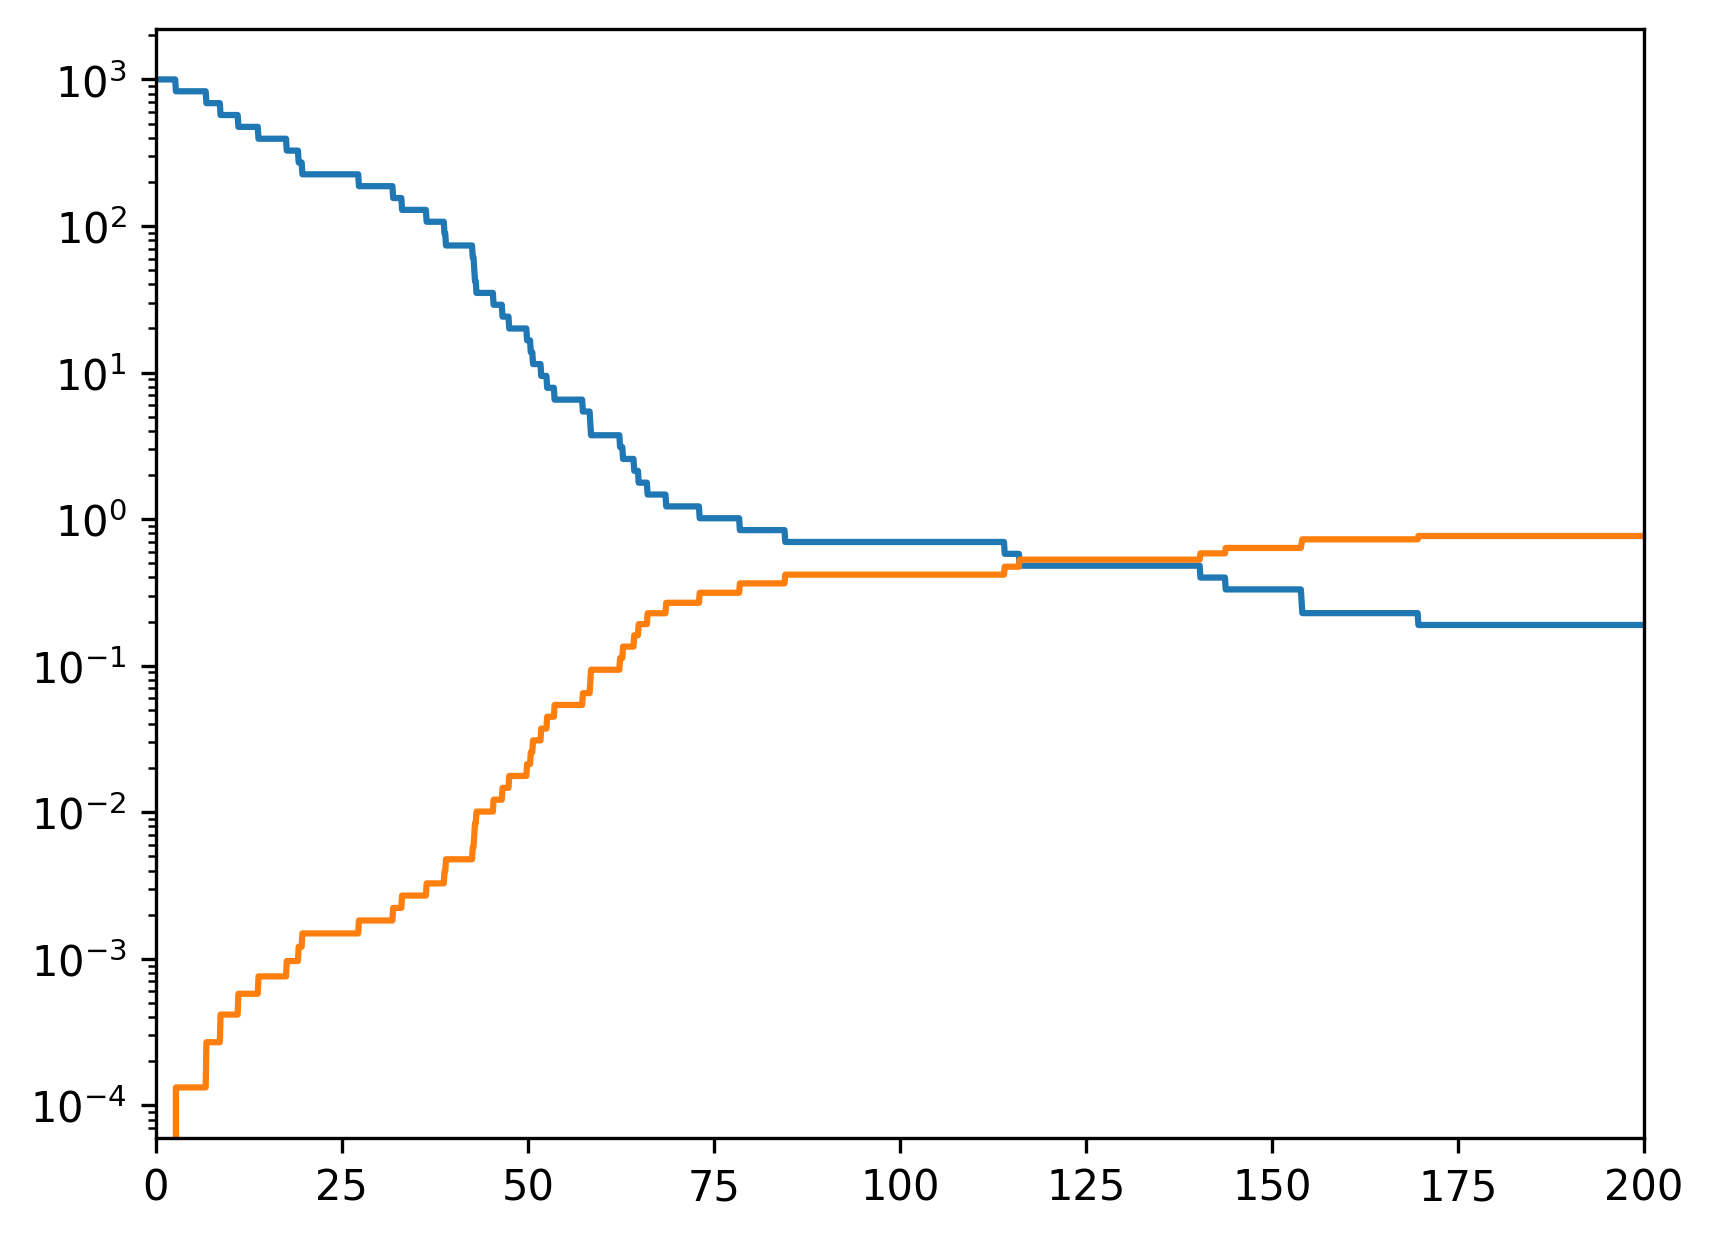

In [17]:
fig, ax = plt.subplots(dpi = 300)
t_list = np.arange(0, iters * dt, dt)
ax.set(xscale = 'linear', yscale = 'log', xlim = (0, 200))
ax.plot(t_list, [np.linalg.norm(u_list[i][0]) for i in range(len(u_list))])
ax.plot(t_list, [np.linalg.norm(u_list[i][1]) for i in range(len(u_list))])
plt.show()

## ExB Drift

In [69]:
B0 = 1
E0 = B0 * (1 - 5e-5)

def B_cross(position):
    return np.array([B0, 0, 0])

def E_cross(position):
    return np.array([0, 0, E0])

In [86]:
x = np.array([0, 0, 0])
u = np.array([0, 0, 0])

# iters = int(1e6)
# dt = 1e-1
pusher = Boris()

t = 2 * np.pi * 10**7
dt = 50 * 1e-6
iters = int(t / delta_t)
iters = 1000

x_list = []
u_list = []

for i in ProgIter(range(iters)):
    x, u = pusher.push(x, u, E_cross, B_cross, dt)
    x_list.append(x)


 100.00% 1000/1000... rate=16348.60 Hz, eta=0:00:00, total=0:00:00


In [62]:
np.max(z_coor)

20206.0086232458

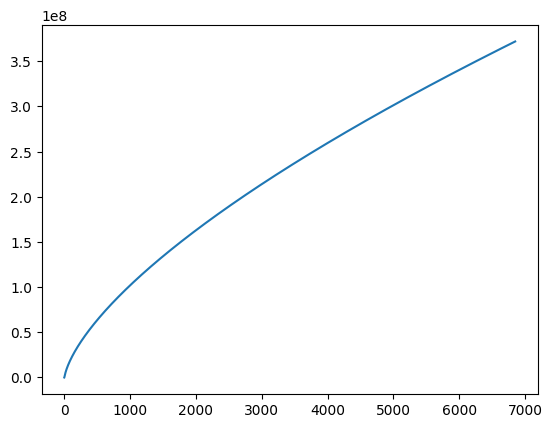

In [80]:
plt.plot(z_coor[::1000])

In [84]:
z_coor

[0.0024998749953130473,
 0.007499624960942267,
 0.014999249846893908,
 0.024998749578177354,
 0.03749812405480511,
 0.05249737315179284,
 0.06999649671915932,
 0.08999549458192649,
 0.11249436654011945,
 0.13749311236876643,
 0.1649917318178989,
 0.19499022461255144,
 0.2274885904527619,
 0.2624868290135713,
 0.29998493994502384,
 0.3399829228721671,
 0.3824807773950517,
 0.42747850308873175,
 0.4749760995032646,
 0.5249735661637107,
 0.5774709025701342,
 0.6324681081976024,
 0.6899651824961859,
 0.7499621248909588,
 0.8124589347819987,
 0.8774556115443864,
 0.9449521545282066,
 1.014948563058547,
 1.0874448364354994,
 1.1624409739341586,
 1.2399369748046234,
 1.3199328382719961,
 1.4024285635363827,
 1.4874241497728926,
 1.5749195961316396,
 1.6649149017377407,
 1.757410065691317,
 1.852405087067493,
 1.949899964916398,
 2.0498946982631643,
 2.152389286107929,
 2.257383727425832,
 2.3648780211670184,
 2.4748721662566373,
 2.587366161594842,
 2.702360006056789,
 2.81985369849264,
 2.93

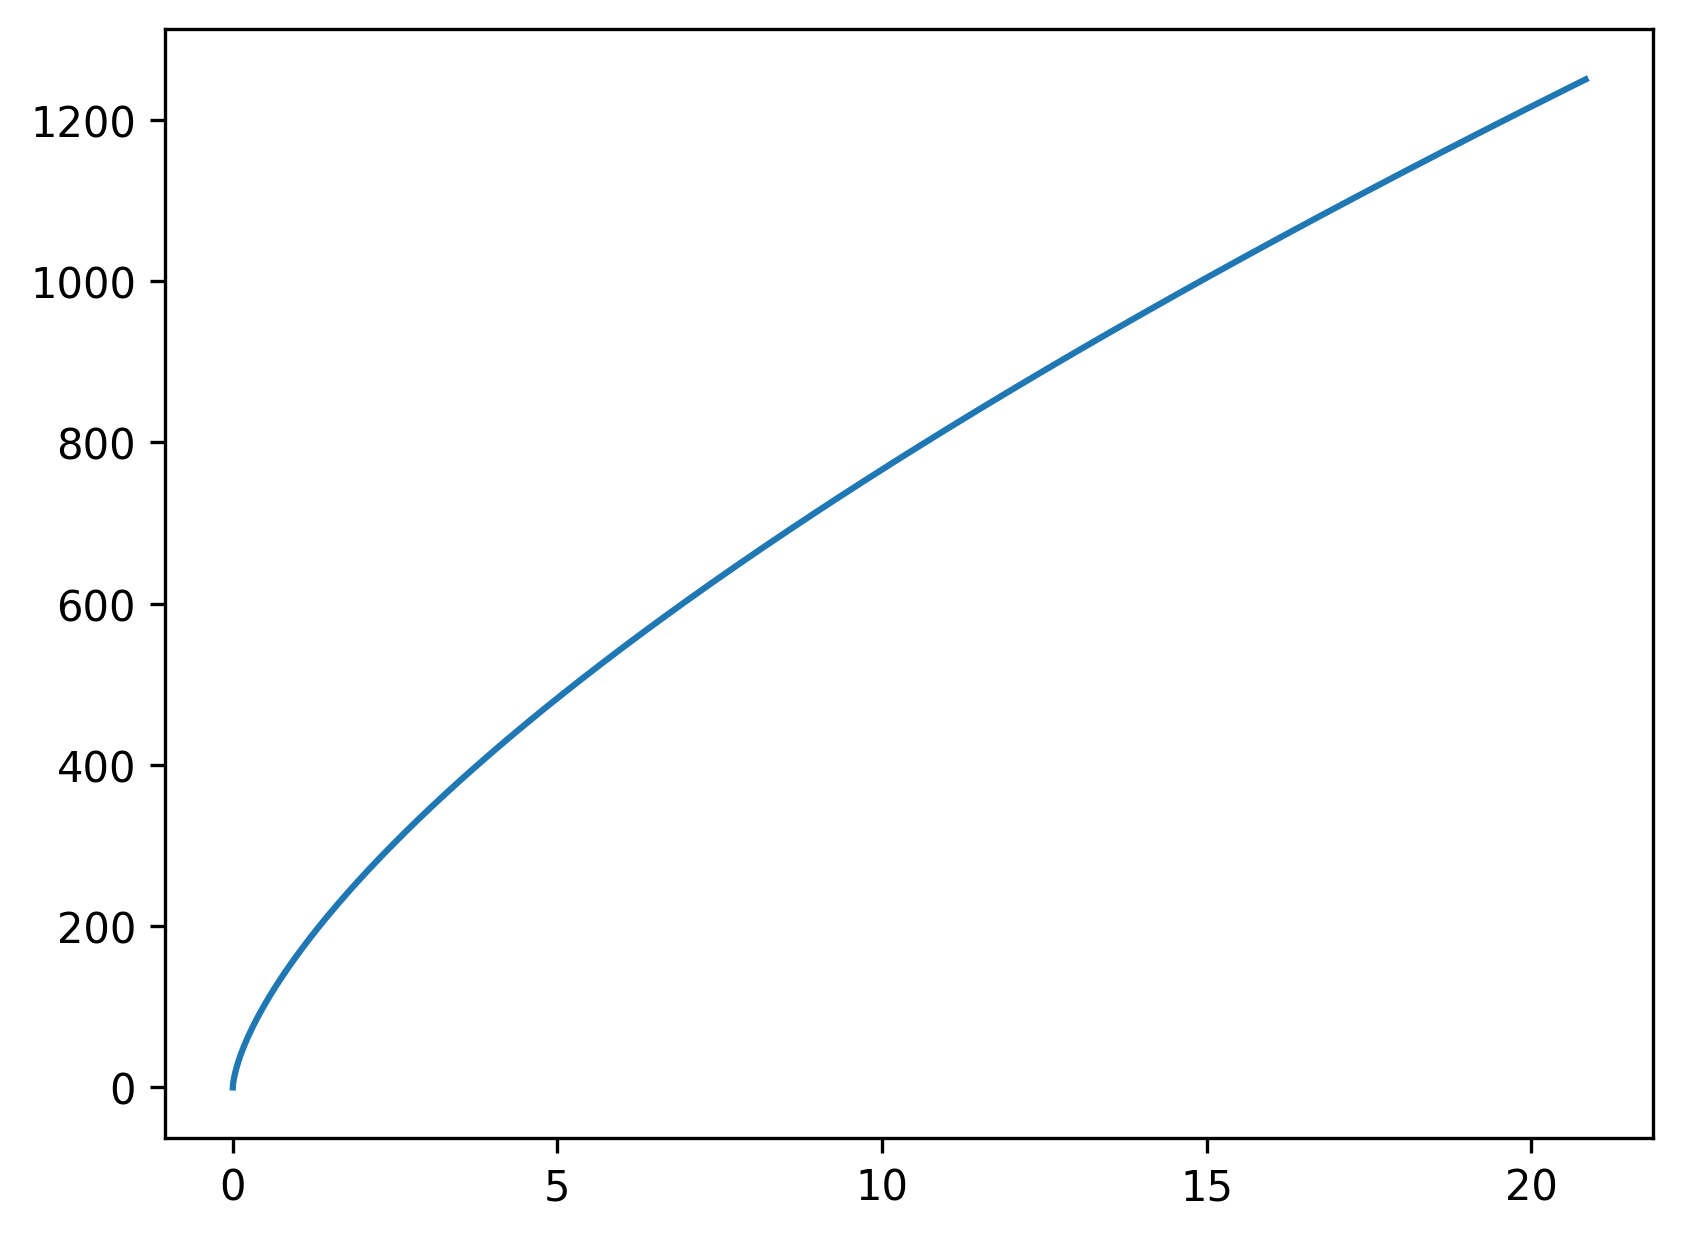

In [85]:
x_coor = [i[0] for i in x_list]
y_coor = [i[1] for i in x_list]
z_coor = [i[2] for i in x_list]

%matplotlib inline
fig, ax = plt.subplots(dpi = 300)

ax.plot(y_coor[::1], z_coor[::1])
#ax.set_aspect(1)
plt.show()

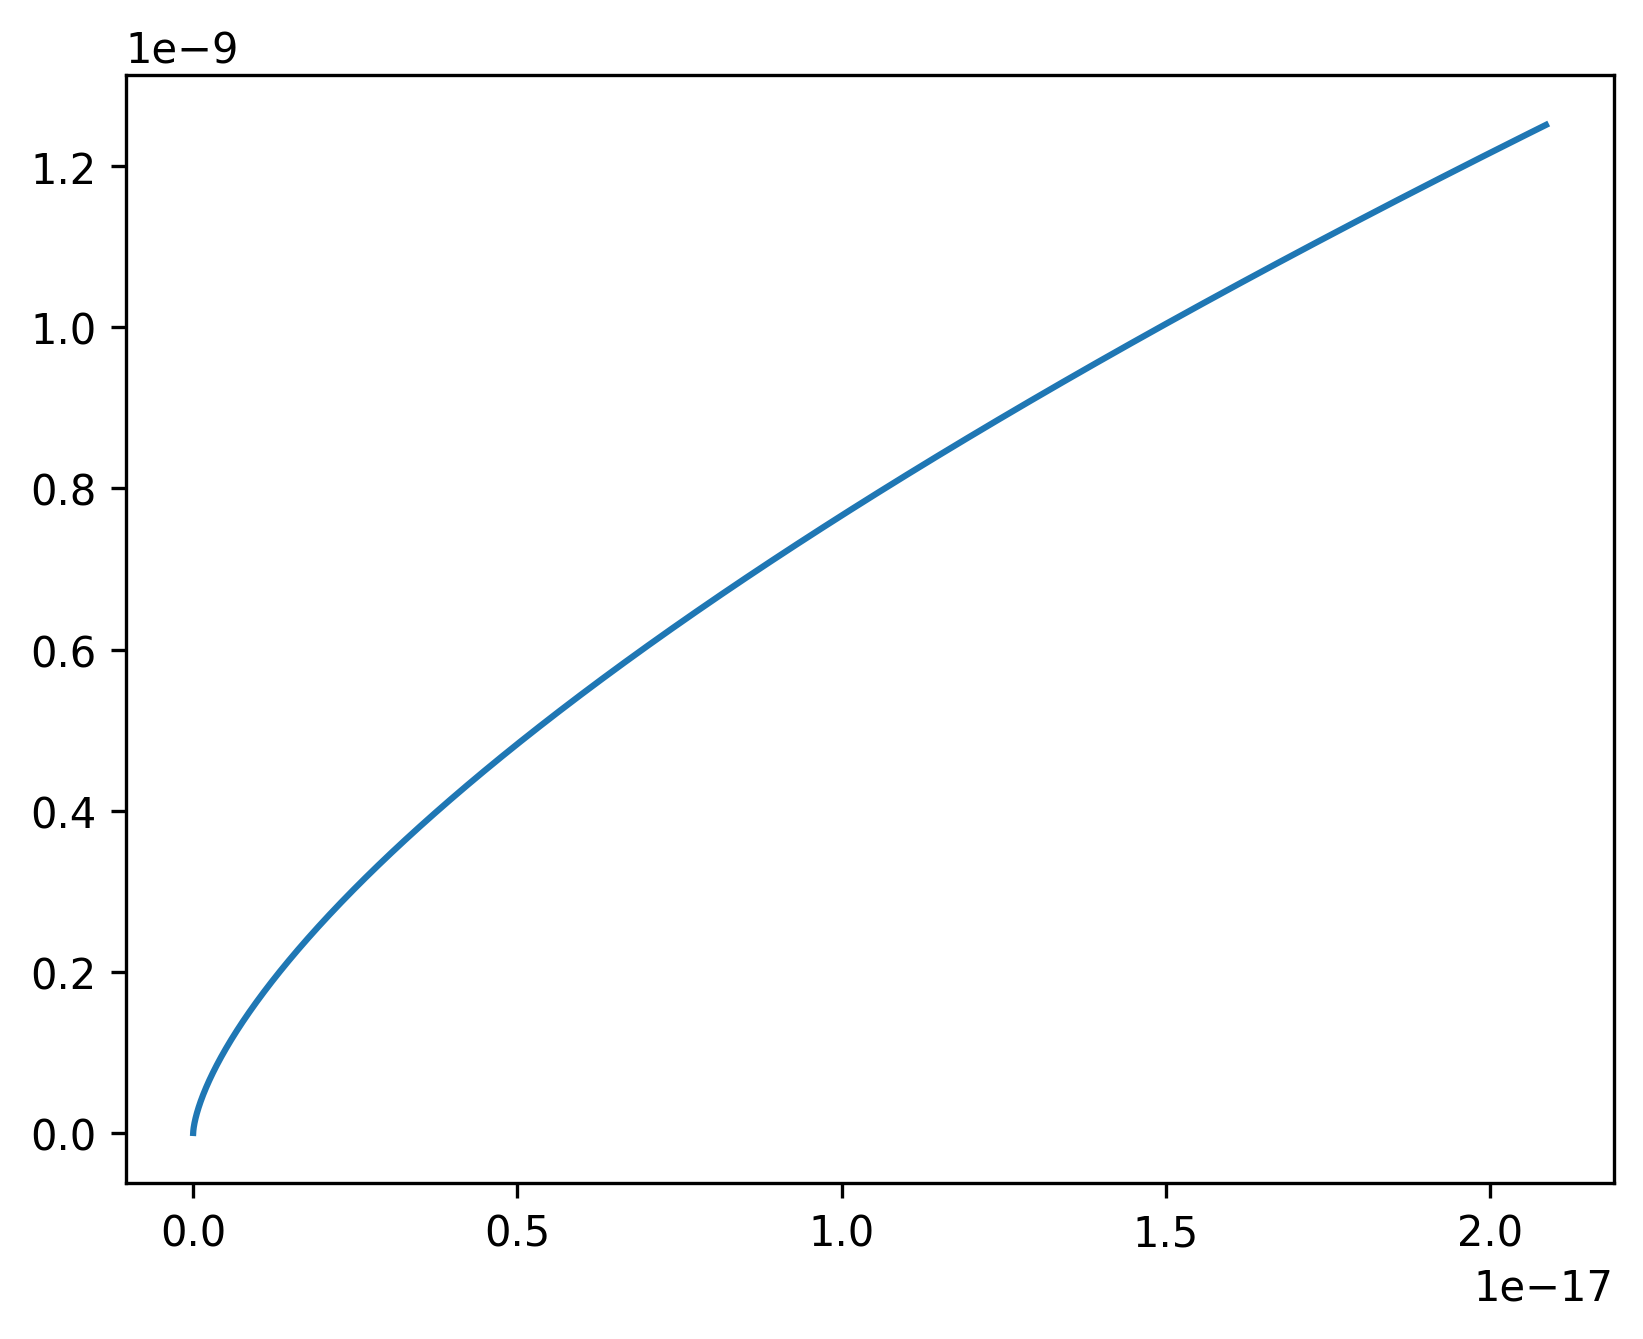

In [87]:
x_coor = [i[0] for i in x_list]
y_coor = [i[1] for i in x_list]
z_coor = [i[2] for i in x_list]

%matplotlib inline
fig, ax = plt.subplots(dpi = 300)

ax.plot(y_coor[::1], z_coor[::1])
#ax.set_aspect(1)
plt.show()

In [ ]:
x = np.array([0, 0, 0])
u = np.array([0, 0, 0])

# iters = int(1e6)
# dt = 1e-1
pusher = Boris()

t = 2 * np.pi * 10**7
dt = 50 * 1e-6
iters = int(t / delta_t)
iters = 1000

x_list = []
u_list = []

for i in ProgIter(range(iters)):
    x, u = pusher.push(x, u, E_cross, B_cross, dt)
    x_list.append(x)